In [1]:
# Import the necessary libraries for web scraping and data manipulation
import requests  # Used to make HTTP requests to fetch web content
from bs4 import BeautifulSoup  # Used for parsing HTML and XML documents
import pandas as pd  # Provides data structures and data analysis tools
import time  # Provides various time-related functions

## Properties in Trulia.com
Trulia, an eminent online platform for real estate, serves as a pivotal resource for individuals seeking to purchase or lease properties. It furnishes a comprehensive array of details pertaining to real estate listings, encompassing visual depictions, financial valuation, dimensions, and an enumeration of living spaces.

The present study endeavors to extract property information, including the quantity of rooms, property area, and pricing, which could be instrumental in analyzing the housing market. Given the constraints of computational resources and legal considerations, this research will confine its scope to a small sample from two American cities, San Francisco (SF) and New York (NY), exclusively for the purpose of illustrating the methodology of web scraping, as well as the subsequent data cleaning, processing, and storage procedures.

The extraction of web data will predominantly be executed utilizing the BeautifulSoup library, a widely recognized tool for this purpose. Post-cleaning, the data is anticipated to be structured, warranting its storage in a PostgreSQL database. This approach not only ensures the systematic organization of data but also facilitates efficient retrieval and analysis, thereby contributing significantly to the study's objectives in the context of the housing market.

### San Francisco (SF)

In [2]:
# Set headers to mimic a browser request for reliable access
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'
}

# The website URL to scrape from
sf_url = 'https://www.trulia.com/CA/San_Francisco/'

# Fetch the webpage content
response = requests.get(sf_url, headers=headers)

# Check if the webpage is accessible
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all property cards on the webpage
    property_cards = soup.find_all("div", {"data-testid":"property-card-details"})
    
    # List to hold all property information
    all_property_info = []
    
    # Extract and store information from each property card
    for card in property_cards:
        property_info = {}  # Dictionary to store info of a single property
        
        # Extract relevant data from each card
        divs = card.find_all("div")
        for div in divs:
            data_testid = div.get("data-testid")
            # Filter out interested attribute to be extracted
            if data_testid in ["property-price", "property-beds", "property-baths", "property-floorSpace", "property-address"]:
                property_info[data_testid] = div.get_text(strip=True)
        
        all_property_info.append(property_info)  # Add the property's info to the list

else:
    # If the webpage is not accessible, print an error message
    print('Failed to retrieve the webpage')

In [3]:
# Loop through page numbers 2 to 44 (inclusive) to scrape property data from each page
for i in range(2, 45):
    # Construct the URL for the current page by appending the page number to the base URL
    url = f"{sf_url}{i}_p/"
    # Fetch the content of the current page
    response = requests.get(url, headers=headers)
    # Print the status of the request for debugging purposes
    print(f"Retrieving {url}, status code: {response.status_code}")
    
    # Check if the webpage is accessible (status code 200)
    if response.status_code == 200:
        # Pause for 1 second to avoid overwhelming the server
        time.sleep(1)
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all property cards on the current page
        property_cards = soup.find_all("div", {"data-testid":"property-card-details"})
        
        # Extract information from each property card
        for card in property_cards:
            property_info = {}  # Dictionary to store info of a single property
            
            # Extract relevant data from each card
            divs = card.find_all("div")
            for div in divs:
                data_testid = div.get("data-testid")
                # Filter out specific details to be extracted
                if data_testid in ["property-price", "property-beds", "property-baths", "property-floorSpace", "property-address"]:
                    property_info[data_testid] = div.get_text(strip=True)
            
            # Add the extracted information to the list of all properties
            all_property_info.append(property_info)
    else:
        # Print an error message if the page couldn't be retrieved
        print(f"Failed to retrieve {url}")

Retrieving https://www.trulia.com/CA/San_Francisco/2_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/3_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/4_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/5_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/6_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/7_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/8_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/9_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/10_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/11_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/12_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/13_p/, status code: 200
Retrieving https://www.trulia.com/CA/San_Francisco/14_p/, status code: 200
Retrieving https://www.trulia.com

In [5]:
all_property_info[:2]

[{'property-price': '$1,495,000',
  'property-beds': '3bd',
  'property-baths': '2ba',
  'property-floorSpace': '1,500 sqft',
  'property-address': '403 Broderick St #1,San Francisco, CA 94117'},
 {'property-price': '$4,695,000',
  'property-beds': '5bd',
  'property-baths': '6ba',
  'property-address': '435 Laidley St,San Francisco, CA 94131'}]

In [5]:
# Create a DataFrame from the list of property information dictionaries
df_sf = pd.DataFrame(all_property_info)

# Display the DataFrame to review its contents
df_sf

,property-price,property-beds,property-baths,property-floorSpace,property-address
0,"$998,000",3bd,2ba,"1,100 sqft","66 Granada Ave,San Francisco, CA 94112"
1,"$2,595,000",4bd,4ba,"3,931 sqft","62 Laidley St,San Francisco, CA 94131"
2,"$2,795,000",4bd,4ba,"4,090 sqft","60 Laidley St,San Francisco, CA 94131"
3,"$782,000",Studio,1ba,677 sqft,"1 Bristol Ct #201,San Francisco, CA 94130"
4,"$998,000",3bd,3ba,"1,489 sqft","121 Randolph St,San Francisco, CA 94132"
...,...,...,...,...,...
310,"$2,795,000",4bd,4ba,"4,090 sqft","60 Laidley St,San Francisco, CA 94131"
311,"$782,000",Studio,1ba,677 sqft,"1 Bristol Ct #201,San Francisco, CA 94130"
312,"$998,000",3bd,3ba,"1,489 sqft","121 Randolph St,San Francisco, CA 94132"
313,"$1,095,000",1bd,1ba,898 sqft,"1 Bristol Ct #411,San Francisco, CA 94130"


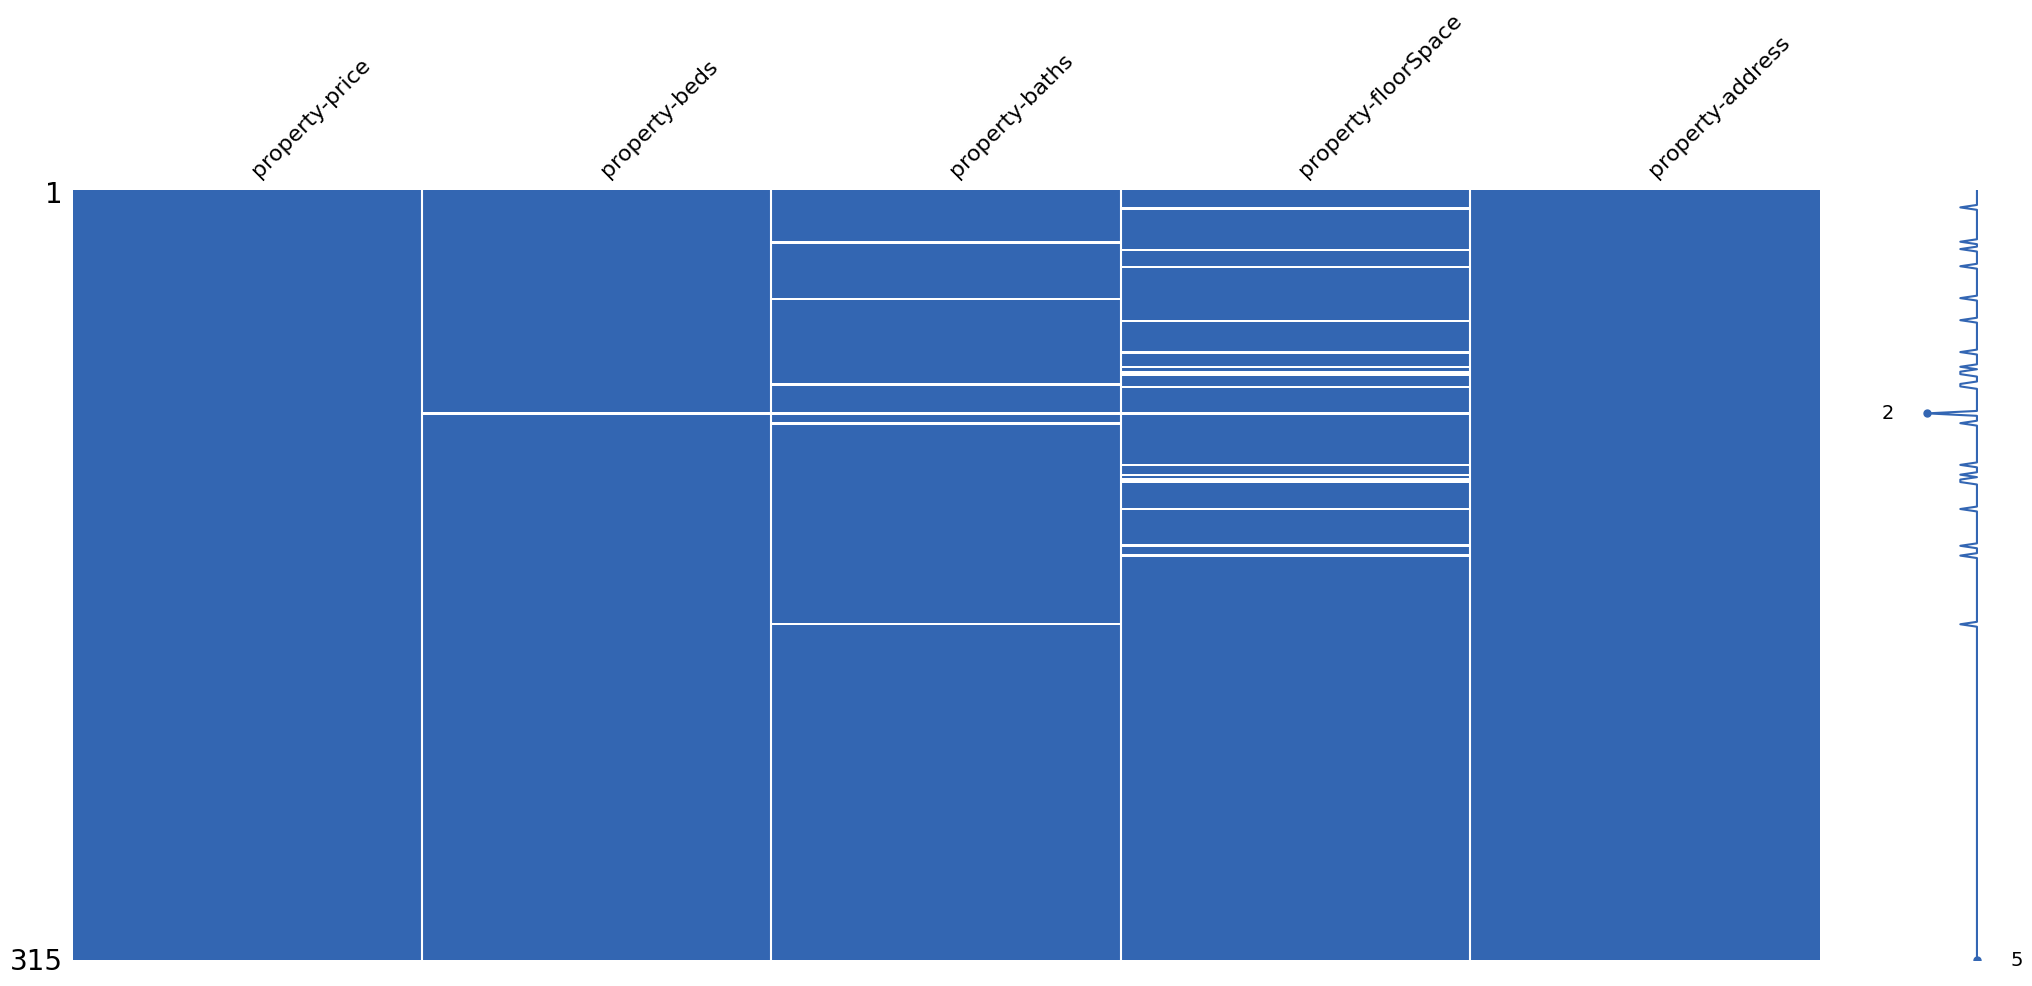

In [6]:
# The missing data matrix visualization below provides a quick visual summary of the completeness of the dataset. 
# Each column represents a variable in the dataset, and the horizontal lines indicate missing values.
import subprocess
subprocess.call("yes|pip install missingno -q -q -q", shell=True)
import missingno as msno
msno.matrix(df_sf,color=(0.2,0.4,0.7));

In [7]:
df_sf_1 = df_sf.copy()

def clean_property_data(df):
    # Make a copy of the DataFrame to avoid changing the original data
    df_cleaned = df.copy()
    
    # Define a function to remove non-numeric characters and convert to float
    df_cleaned['property-price'] = df_cleaned['property-price'].replace('[\$,+]', '', regex=True)
    
    # Check for non-numeric prices after cleaning
    if df_cleaned['property-price'].isnull().any():
        print("Non-numeric entries found in 'property-price'")
    
    # Extract numbers and convert 'property-beds' and 'property-baths' to float
    df_cleaned['property-beds'] = df_cleaned['property-beds'].str.extract('(\d+)').astype(float)
    df_cleaned['property-baths'] = df_cleaned['property-baths'].str.extract('(\d+)').astype(float)
    
    # Clean 'property-floorSpace', remove commas, extract numbers and convert to float
    df_cleaned['property-floorSpace'] = df_cleaned['property-floorSpace'].str.replace(',', '').str.extract('(\d+)').astype(float)
    
    # Calculate the mean floor space for each 'property-beds' category
    mean_floor_space_per_bed = df_cleaned.groupby('property-beds')['property-floorSpace'].transform('mean')
    
    # Fill in missing 'property-floorSpace' values with the mean for the corresponding 'property-beds'
    df_cleaned['property-floorSpace'] = df_cleaned.apply(
        lambda row: mean_floor_space_per_bed[row.name] if pd.isnull(row['property-floorSpace']) else row['property-floorSpace'],
        axis=1
    )
    # Drop missing values in beds & baths
    df_cleaned = df_cleaned.dropna(subset=['property-beds', 'property-baths', 'property-floorSpace'])
    
    # Round the 'property-floorSpace'
    df_cleaned['property-floorSpace'] = df_cleaned['property-floorSpace'].round(0)
    
    # Split 'property-address' into 'street', 'city', and 'zip code'
    df_cleaned[['street', 'city_zip']] = df_cleaned['property-address'].str.rsplit(',', 1, expand=True)
    df_cleaned[['city', 'zip_code']] = df_cleaned['city_zip'].str.rsplit(' ', 1, expand=True)
    
    # Remove the intermediate column
    df_cleaned.drop(columns=['city_zip'], inplace=True)
    
    # Remove duplicate rows
    df_cleaned.drop_duplicates(inplace=True)
    
    # Return the cleaned DataFrame
    return df_cleaned

# Use the function on your DataFrame
df_sf_cleaned = clean_property_data(df_sf_1)
df_sf_cleaned

/tmp/ipykernel_126/3710314117.py:36: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_cleaned[['street', 'city_zip']] = df_cleaned['property-address'].str.rsplit(',', 1, expand=True)
/tmp/ipykernel_126/3710314117.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_cleaned[['city', 'zip_code']] = df_cleaned['city_zip'].str.rsplit(' ', 1, expand=True)


,property-price,property-beds,property-baths,property-floorSpace,property-address,street,city,zip_code
0,998000,3.0,2.0,1100.0,"66 Granada Ave,San Francisco, CA 94112","66 Granada Ave,San Francisco",CA,94112
1,2595000,4.0,4.0,3931.0,"62 Laidley St,San Francisco, CA 94131","62 Laidley St,San Francisco",CA,94131
2,2795000,4.0,4.0,4090.0,"60 Laidley St,San Francisco, CA 94131","60 Laidley St,San Francisco",CA,94131
4,998000,3.0,3.0,1489.0,"121 Randolph St,San Francisco, CA 94132","121 Randolph St,San Francisco",CA,94132
5,1095000,1.0,1.0,898.0,"1 Bristol Ct #411,San Francisco, CA 94130","1 Bristol Ct #411,San Francisco",CA,94130
...,...,...,...,...,...,...,...,...
176,23500000,6.0,10.0,11200.0,"337 Belvedere Ave,Belvedere, CA 94920","337 Belvedere Ave,Belvedere",CA,94920
178,1298888,5.0,4.0,2168.0,"1642 14th St,Oakland, CA 94607","1642 14th St,Oakland",CA,94607
179,725000,2.0,1.0,1415.0,"1200 65th St #303,Emeryville, CA 94608","1200 65th St #303,Emeryville",CA,94608
180,1200000,3.0,2.0,1591.0,"84 Shakespeare St,Daly City, CA 94014","84 Shakespeare St,Daly City",CA,94014


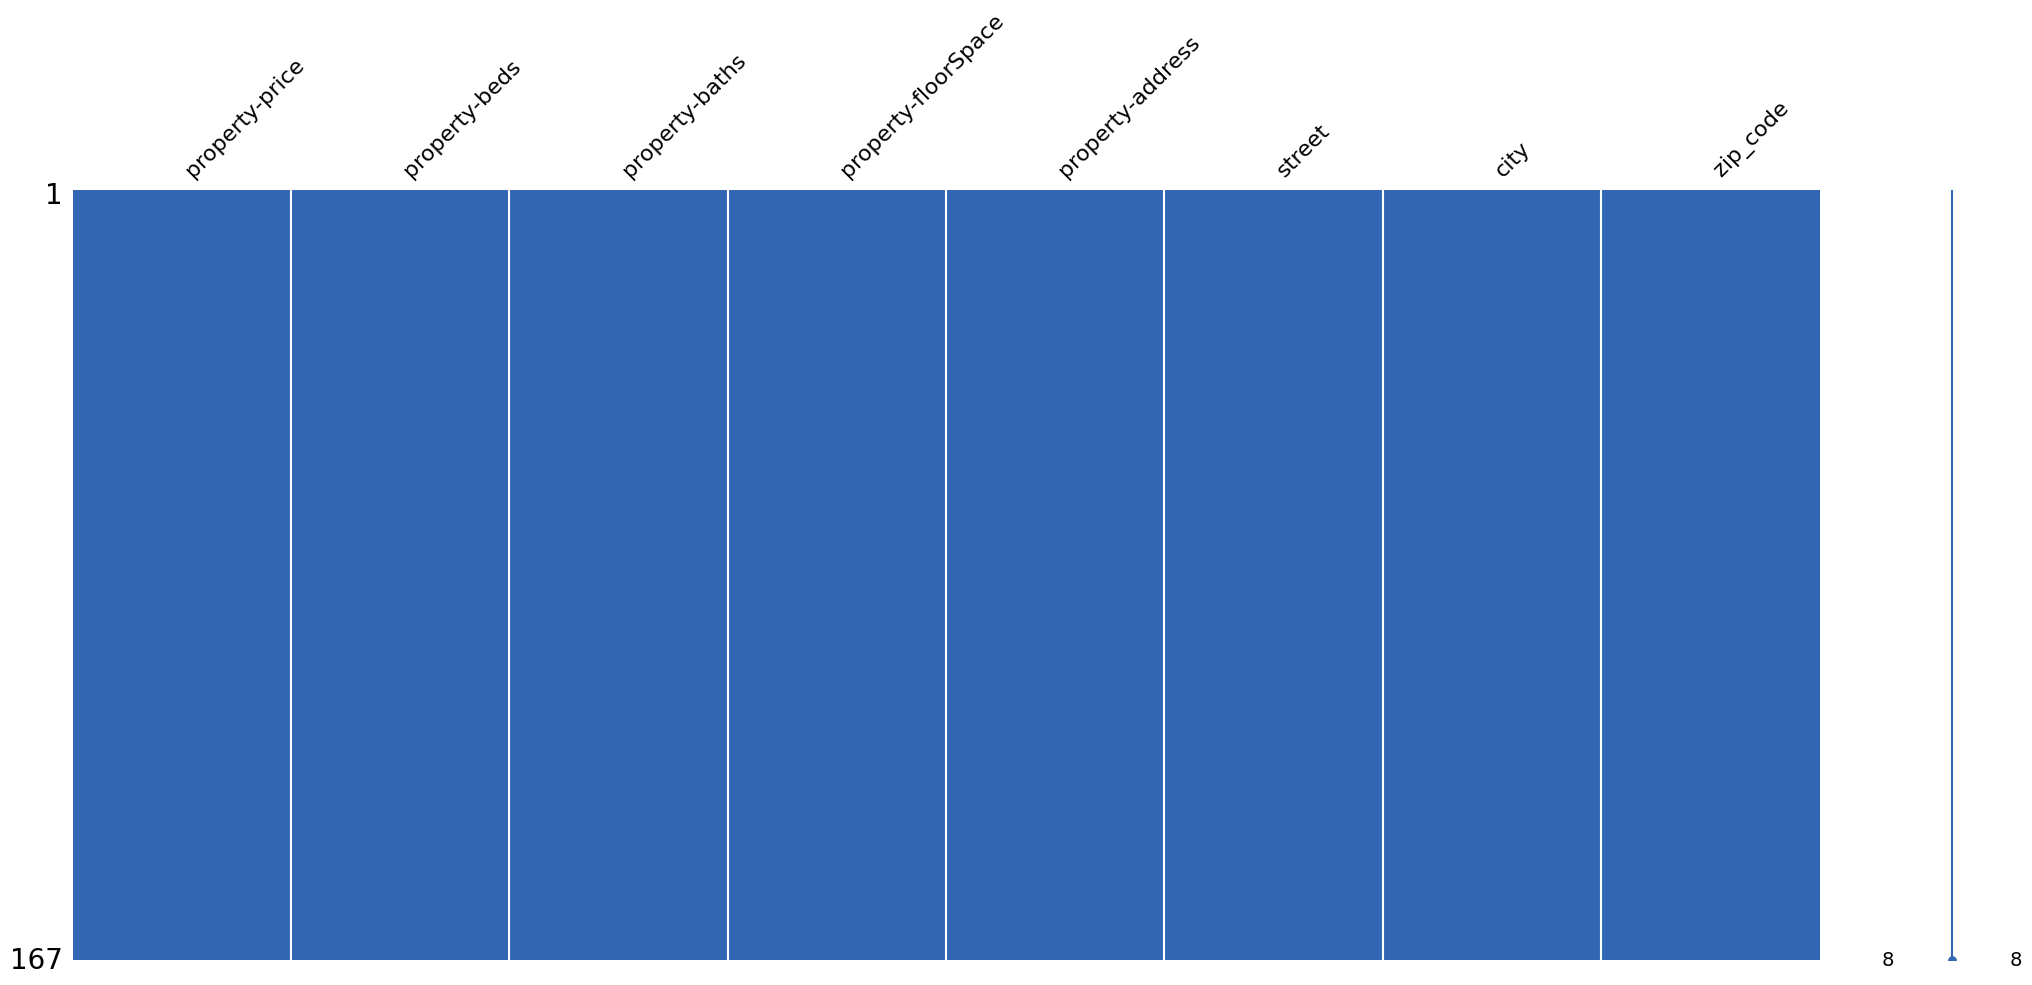

In [10]:
subprocess.call("yes|pip install missingno -q -q -q", shell=True)
msno.matrix(df_sf_cleaned,color=(0.2,0.4,0.7));

In [8]:
df_sf_cleaned.to_csv('San_Francisco_property.csv', index=False)

### New York (NY)

In [9]:
# The website URL to scrape fromny
ny_url = 'https://www.trulia.com/NY/New_York/'
# Fetch the webpage content
response = requests.get(ny_url, headers=headers)


# Check if the webpage is accessible
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all property cards on the webpage
    property_cards = soup.find_all("div", {"data-testid":"property-card-details"})
    
    # List to hold all property information
    all_property_info = []
    
    # Extract and store information from each property card
    for card in property_cards:
        property_info = {}  # Dictionary to store info of a single property
        
        # Extract relevant data from each card
        divs = card.find_all("div")
        for div in divs:
            data_testid = div.get("data-testid")
            # Filter out interested attribute to be extracted
            if data_testid in ["property-price", "property-beds", "property-baths", "property-floorSpace", "property-address"]:
                property_info[data_testid] = div.get_text(strip=True)
        
        all_property_info.append(property_info)  # Add the property's info to the list

else:
    # If the webpage is not accessible, print an error message
    print('Failed to retrieve the webpage')

# Loop through page numbers 2 to 44 (inclusive) to scrape property data from each page
for i in range(2, 45):
    # Construct the URL for the current page by appending the page number to the base URL
    url = f"{ny_url}{i}_p/"
    # Fetch the content of the current page
    response = requests.get(url, headers=headers)
    # Print the status of the request for debugging purposes
    print(f"Retrieving {url}, status code: {response.status_code}")
    
    # Check if the webpage is accessible (status code 200)
    if response.status_code == 200:
        # Pause for 1 second to avoid overwhelming the server
        time.sleep(1)
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all property cards on the current page
        property_cards = soup.find_all("div", {"data-testid":"property-card-details"})
        
        # Extract information from each property card
        for card in property_cards:
            property_info = {}  # Dictionary to store info of a single property
            
            # Extract relevant data from each card
            divs = card.find_all("div")
            for div in divs:
                data_testid = div.get("data-testid")
                # Filter out specific details to be extracted
                if data_testid in ["property-price", "property-beds", "property-baths", "property-floorSpace", "property-address"]:
                    property_info[data_testid] = div.get_text(strip=True)
            
            # Add the extracted information to the list of all properties
            all_property_info.append(property_info)
    else:
        # Print an error message if the page couldn't be retrieved
        print(f"Failed to retrieve {url}")

Retrieving https://www.trulia.com/NY/New_York/2_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/3_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/4_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/5_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/6_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/7_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/8_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/9_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/10_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/11_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/12_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/13_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/14_p/, status code: 200
Retrieving https://www.trulia.com/NY/New_York/15_p/, status code: 200
Retrieving https://www.truli

In [11]:
# Create a DataFrame from the list of property information dictionaries
df_ny = pd.DataFrame(all_property_info)

# Display the DataFrame to review its contents
df_ny

,property-price,property-beds,property-baths,property-floorSpace,property-address
0,"$888,000",3bd,2ba,"1,296 sqft","7024 Utopia Pkwy,Flushing, NY 11365"
1,"$439,000",2bd,1ba,900 sqft,"414 Elmwood Ave #4F,Brooklyn, NY 11230"
2,"$1,750,000",NaN,NaN,NaN,"21-22 33rd Avenue,Long Island City, NY 11106"
3,"$269,999",1bd,1ba,750 sqft,"2807 Kings Hwy #E2,Brooklyn, NY 11229"
4,"$2,380,000",5bd,6ba,"4,000 sqft","14-54 159th Street,Flushing, NY 11357"
...,...,...,...,...,...
310,"$1,750,000",NaN,NaN,NaN,"21-22 33rd Avenue,Long Island City, NY 11106"
311,"$269,999",1bd,1ba,750 sqft,"2807 Kings Hwy #E2,Brooklyn, NY 11229"
312,"$2,380,000",5bd,6ba,"4,000 sqft","14-54 159th Street,Flushing, NY 11357"
313,"$219,000",1bd,1ba,NaN,"54-44 Little Neck Parkway UNIT 6T,Little Neck,..."


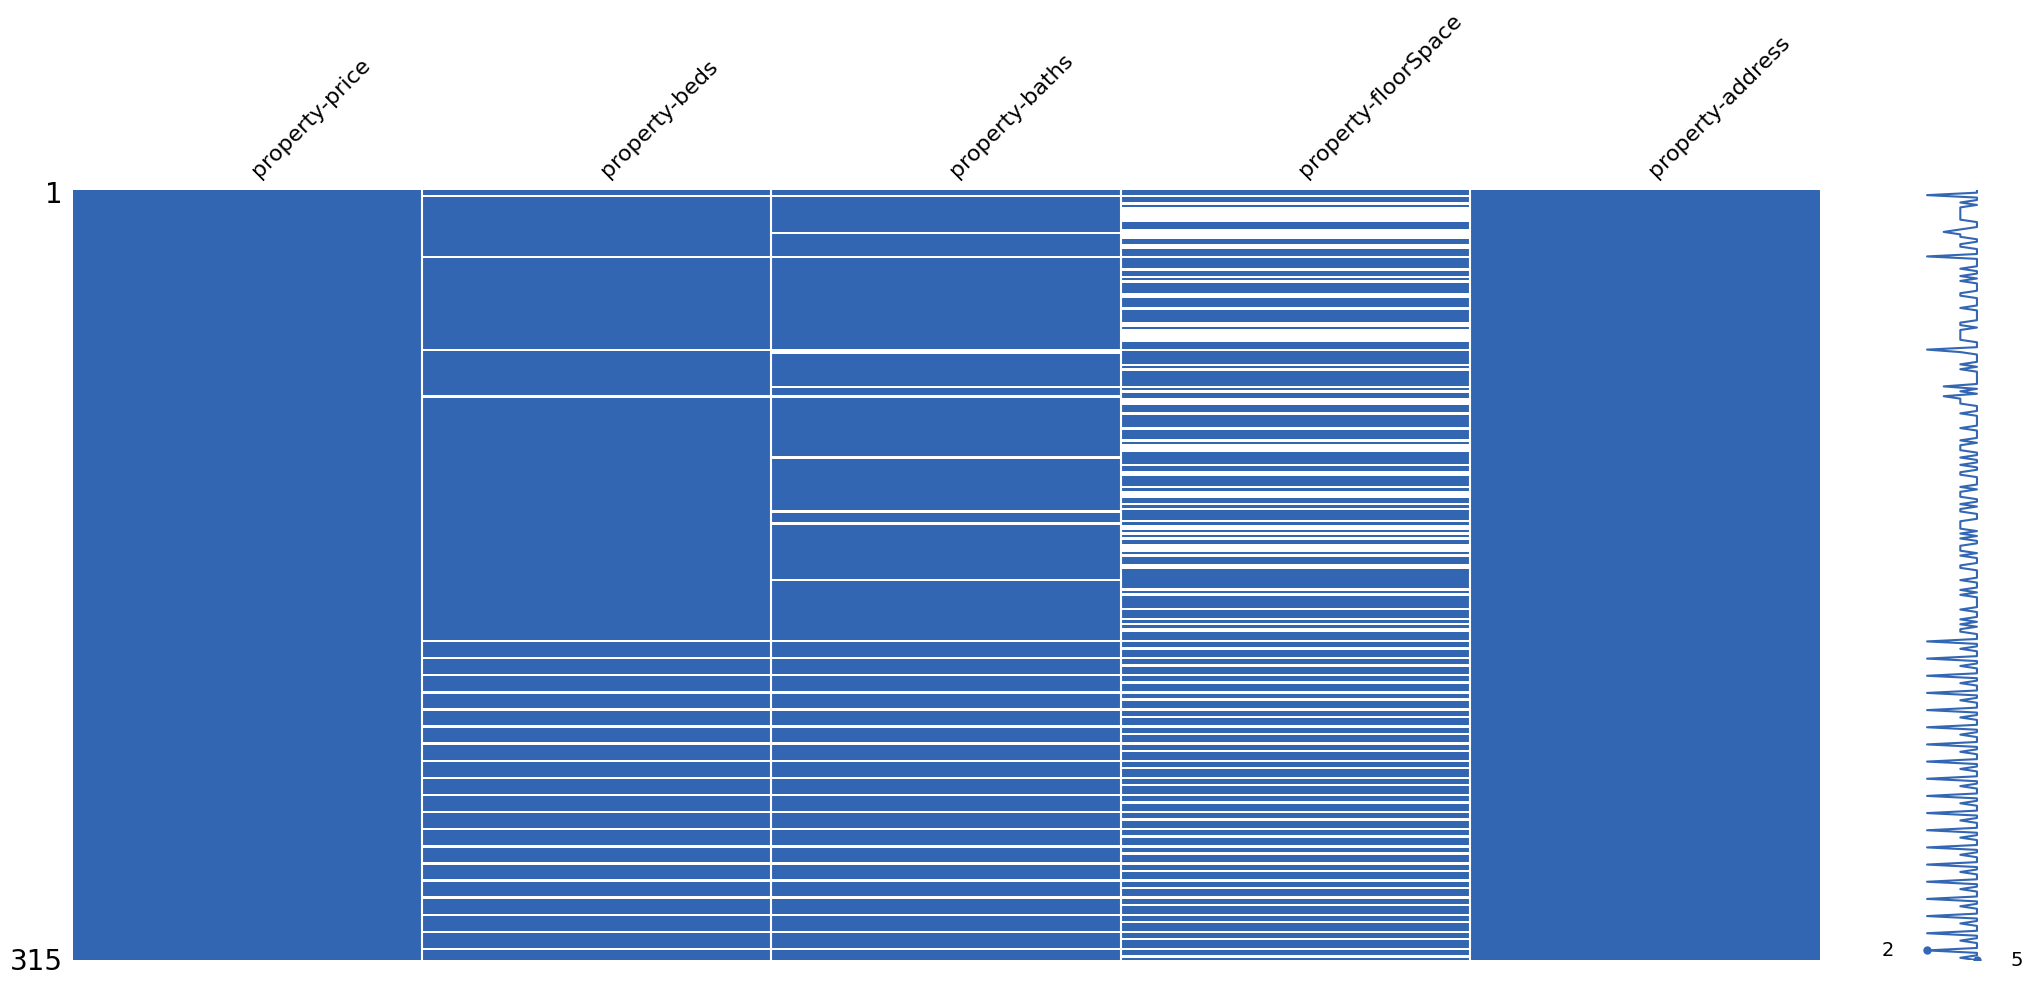

In [12]:
subprocess.call("yes|pip install missingno -q -q -q", shell=True)
msno.matrix(df_ny,color=(0.2,0.4,0.7));

In [13]:
# Use the function on your DataFrame
df_ny_cleaned = clean_property_data(df_ny)
df_ny_cleaned

/tmp/ipykernel_126/3710314117.py:36: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_cleaned[['street', 'city_zip']] = df_cleaned['property-address'].str.rsplit(',', 1, expand=True)
/tmp/ipykernel_126/3710314117.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_cleaned[['city', 'zip_code']] = df_cleaned['city_zip'].str.rsplit(' ', 1, expand=True)


,property-price,property-beds,property-baths,property-floorSpace,property-address,street,city,zip_code
0,888000,3.0,2.0,1296.0,"7024 Utopia Pkwy,Flushing, NY 11365","7024 Utopia Pkwy,Flushing",NY,11365
1,439000,2.0,1.0,900.0,"414 Elmwood Ave #4F,Brooklyn, NY 11230","414 Elmwood Ave #4F,Brooklyn",NY,11230
3,269999,1.0,1.0,750.0,"2807 Kings Hwy #E2,Brooklyn, NY 11229","2807 Kings Hwy #E2,Brooklyn",NY,11229
4,2380000,5.0,6.0,4000.0,"14-54 159th Street,Flushing, NY 11357","14-54 159th Street,Flushing",NY,11357
5,219000,1.0,1.0,709.0,"54-44 Little Neck Parkway UNIT 6T,Little Neck,...","54-44 Little Neck Parkway UNIT 6T,Little Neck",NY,11362
...,...,...,...,...,...,...,...,...
177,2700000,6.0,5.0,2766.0,"90 Essex Dr,Tenafly, NJ 07670","90 Essex Dr,Tenafly",NJ,07670
178,399900,3.0,1.0,1334.0,"363 Atlantic Avenue,North Middletown, NJ 07748","363 Atlantic Avenue,North Middletown",NJ,07748
179,497500,3.0,2.0,1475.0,"12-16 Lexington St #1X,Fair Lawn, NJ 07410","12-16 Lexington St #1X,Fair Lawn",NJ,07410
180,748888,4.0,5.0,2200.0,"35 Mountain Way,West Orange, NJ 07052","35 Mountain Way,West Orange",NJ,07052


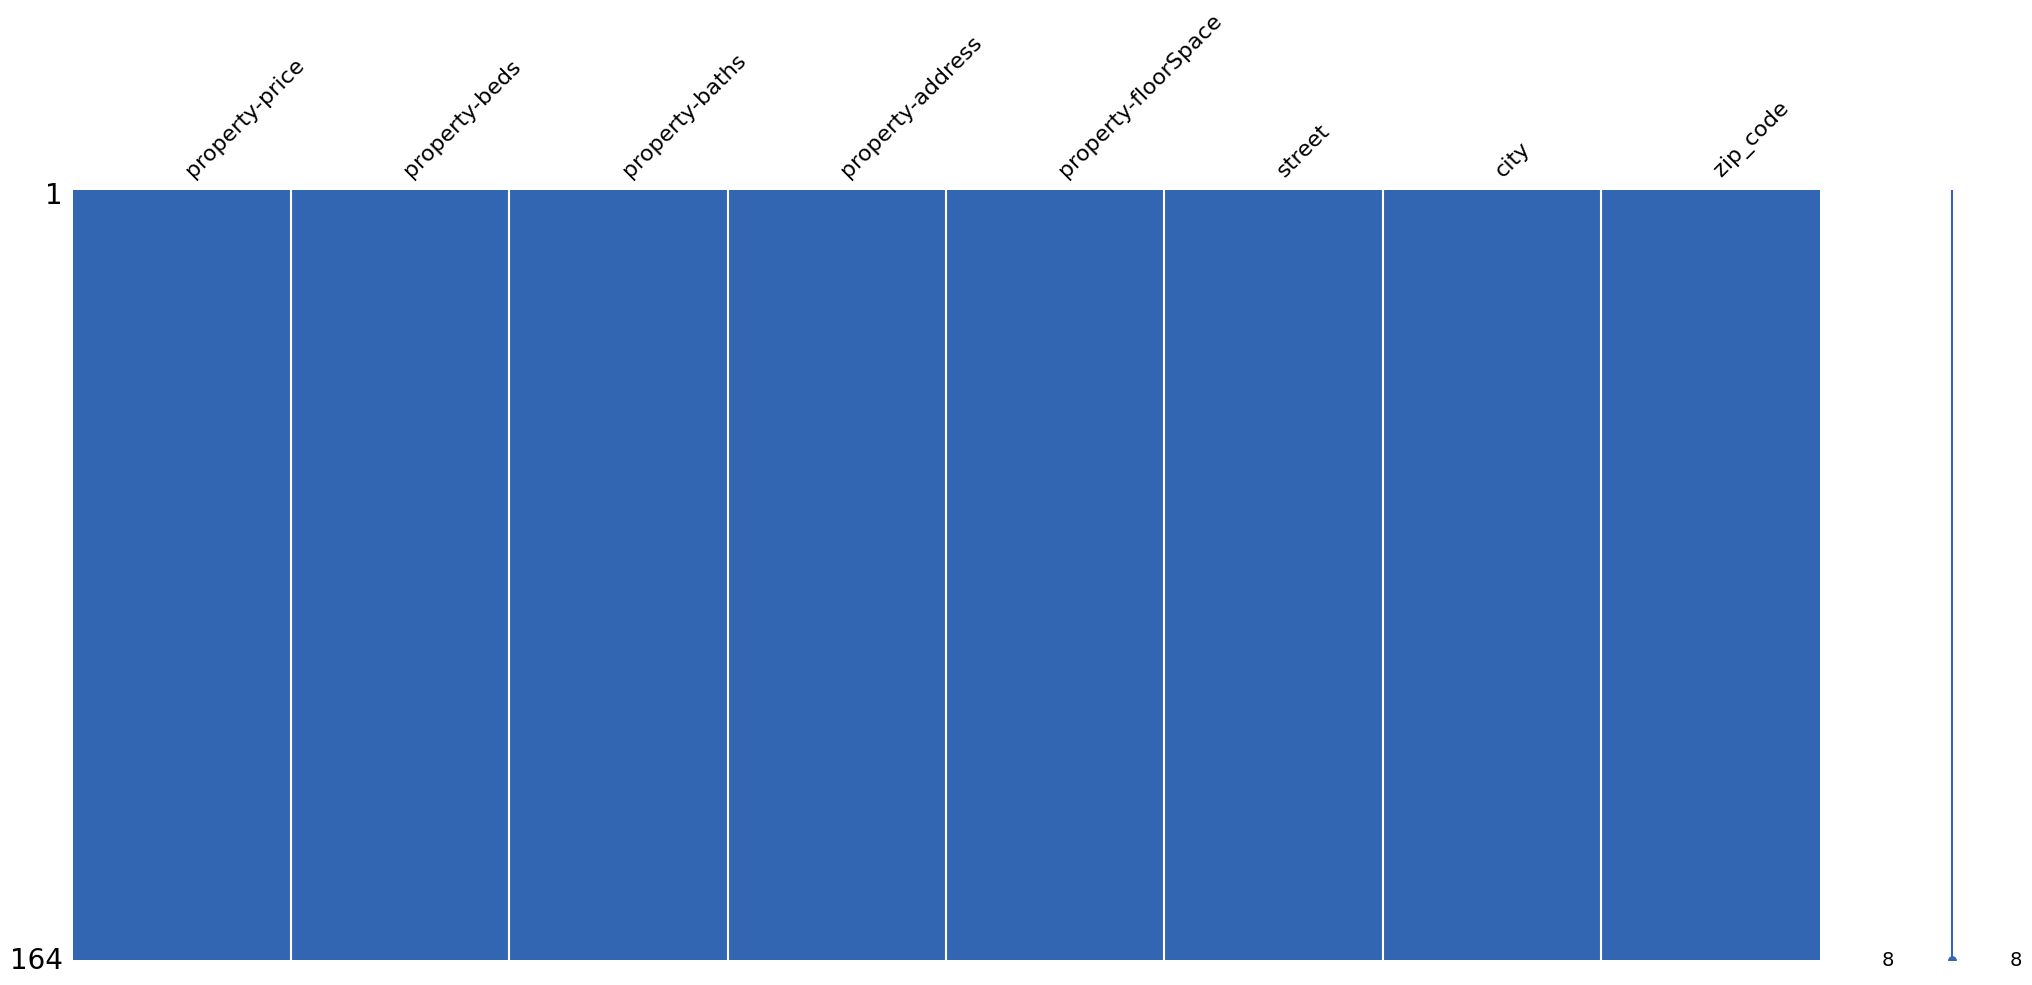

In [25]:
subprocess.call("yes|pip install missingno -q -q -q", shell=True)
msno.matrix(df_ny_cleaned,color=(0.2,0.4,0.7));

In [14]:
df_ny_cleaned.to_csv('New_York_property.csv', index=False)

### Store the DataFrame in a PostgreSQL database

In [15]:
import psycopg2
import pandas as pd

#host="uclba−de24.cluster−cowglvndjvxv.eu−west−2.rds.amazonaws.com" ,
host="13.43.84.151"
dbname="postgres"
user="mingze.fang.23@ucl.ac.uk"
password="urWlYm"
port="5432"
schema="schema_mingzefang23uclacuk"

In [16]:
conn = psycopg2.connect (
    host=host,
    dbname=dbname,
    user=user,
    password=password,
    port=port
)
print("Database connection established")

Database connection established


In [17]:
from sqlalchemy import create_engine
# Establish a connection to the database
conn_string = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
engine = create_engine(conn_string)

df_ny_cleaned.to_sql('new_york_properties', engine, if_exists='replace', index=False, schema=schema)
df_sf_cleaned.to_sql('san_francisco_properties', engine, if_exists='replace', index=False, schema=schema)

print("Data has been successfully stored in the database")

Data has been successfully stored in the database


In [18]:
# Create a cursor object
cur = conn.cursor()

# Query to get all schemas
cur.execute("SELECT schema_name FROM information_schema.schemata;")
schemas = cur.fetchall()

# Print the available schemas
print("Available schemas:")
for schema in schemas:
    print(schema[0])


Available schemas:
pg_catalog
information_schema
schema_mingzefang23uclacuk
public


In [19]:
# Query to get all table names in a specific schema
schema_to_check = 'schema_mingzefang23uclacuk'  # replace with your actual schema name
cur.execute(f"SELECT table_name FROM information_schema.tables WHERE table_schema = '{schema_to_check}';")
tables = cur.fetchall()

# Print the tables in the schema
print(f"Tables in schema '{schema_to_check}':")
for table in tables:
    print(table[0])

# Close the cursor and the connection
cur.close()
conn.close()

Tables in schema 'schema_mingzefang23uclacuk':
example_table
customer
CUSTOMER
Customer
people
new_york_properties
san_francisco_properties
New York Properties
San Francisco Properties
New_York_Properties
San_Francisco_Properties


In [20]:
# fetch the java driver for postgress to allow Spark to connect to postgress
!curl -o postgresql-42.3.2.jar https://jdbc.postgresql.org/download/postgresql-42.3.2.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1015k  100 1015k    0     0   708k      0  0:00:01  0:00:01 --:--:--  707k


In [21]:
import os

current_dir = os.getcwd()
print(current_dir)
jar_location = current_dir + "/postgresql-42.3.2.jar"
jar_location

/home/jovyan/DE/Untitled Folder


'/home/jovyan/DE/Untitled Folder/postgresql-42.3.2.jar'

In [22]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .config("spark.driver.extraClassPath", jar_location)\
    .appName("Enhanced Data Warehouse ETL") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/02 17:10:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [23]:
postgres_uri = f"jdbc:postgresql://{host}:{port}/{dbname}"
dbtable = f"{schema}.people"

df = spark.read \
    .format("jdbc") \
    .option("url", postgres_uri) \
    .option("dbtable", dbtable) \
    .option("user", user) \
    .option("password", password) \
    .option("driver", "org.postgresql.Driver") \
    .load()

df.printSchema()

Py4JJavaError: An error occurred while calling o33.load.
: org.postgresql.util.PSQLException: ERROR: syntax error at or near "'public'"
  Position: 16
	at org.postgresql.core.v3.QueryExecutorImpl.receiveErrorResponse(QueryExecutorImpl.java:2675)
	at org.postgresql.core.v3.QueryExecutorImpl.processResults(QueryExecutorImpl.java:2365)
	at org.postgresql.core.v3.QueryExecutorImpl.execute(QueryExecutorImpl.java:355)
	at org.postgresql.jdbc.PgStatement.executeInternal(PgStatement.java:490)
	at org.postgresql.jdbc.PgStatement.execute(PgStatement.java:408)
	at org.postgresql.jdbc.PgPreparedStatement.executeWithFlags(PgPreparedStatement.java:166)
	at org.postgresql.jdbc.PgPreparedStatement.executeQuery(PgPreparedStatement.java:118)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD$.getQueryOutputSchema(JDBCRDD.scala:68)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD$.resolveTable(JDBCRDD.scala:58)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRelation$.getSchema(JDBCRelation.scala:241)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:37)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:346)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:229)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$2(DataFrameReader.scala:211)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:172)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:840)


In [ ]:

# PostgreSQL JDBC URI
postgres_uri = f"jdbc:postgresql://{host}:{port}/{dbname}"
dbtable = f"{schema}.new_york_properties"
df = spark.read \
    .format("jdbc") \
    .option("url", postgres_uri) \
    .option("dbtable", dbtable) \
    .option("user", user) \
    .option("password", password) \
    .option("driver", "org.postgresql.Driver") \
    .load()

df.printSchema()

In [32]:
df.show()

+--------------+-------------+--------------+--------------------+-------------------+--------------------+----+--------+
|property-price|property-beds|property-baths|    property-address|property-floorSpace|              street|city|zip_code|
+--------------+-------------+--------------+--------------------+-------------------+--------------------+----+--------+
|       1099000|          4.0|           2.0|335 72nd St,Brook...|             1763.0|335 72nd St,Brooklyn|  NY|   11209|
|        819000|         12.0|           6.0|17-08 Palmetto St...|             4140.0|17-08 Palmetto St...|  NY|   11385|
|        698999|          4.0|           2.0|172-04 143rd Road...|             1763.0|172-04 143rd Road...|  NY|   11434|
|       2880000|         36.0|          16.0|5206 6th Ave #1,B...|            12460.0|5206 6th Ave #1,B...|  NY|   11220|
|        708000|          3.0|           2.0|44 Loring Ave,Sta...|             1472.0|44 Loring Ave,Sta...|  NY|   10312|
|        899900|        